In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('py_sent_Eng_to_Spa.csv')

## Note: the sentiments within each language are relative: in each sample the values add up to 1.0 for Spanish and for English.

In [13]:
ordered_columns = ['English', 'Spanish', 
                   'English_POS', 'Spanish_POS', 
                   'English_NEU', 'Spanish_NEU', 
                   'English_NEG', 'Spanish_NEG', 
                  ]

# Create a new DataFrame with the columns reordered
df = df[ordered_columns]
df

,English,Spanish,English_POS,Spanish_POS,English_NEU,Spanish_NEU,English_NEG,Spanish_NEG
0,It’s 2009 Alyssa Elliot is sitting at her desk...,"Es 2009, Alyssa Elliot está sentada en su escr...",0.005903,0.003822,0.767613,0.950366,0.226484,0.045812
1,You say things like I couldn’t have foreseen t...,Dices cosas como si no hubiera podido prever q...,0.009275,0.020460,0.837934,0.799058,0.152790,0.180481
2,"This is Last Day, a show about the moments tha...","Este es Last Day, un programa sobre los moment...",0.063963,0.422975,0.005896,0.024352,0.930141,0.552673
3,"Alyssa grew up in Boise, Idaho with her mom, d...","Alyssa creció en Boise, Idaho con su mamá, su ...",0.055467,0.356286,0.003801,0.027817,0.940731,0.615897
4,That is with an S not a Z biggest pet peeve.,"Eso es con una S, no con una Z, lo que más le ...",0.004403,0.018373,0.946207,0.744763,0.049390,0.236864
...,...,...,...,...,...,...,...,...
715,It was crazy.,Fue loco.,0.729142,0.326488,0.029644,0.284107,0.241214,0.389404
716,Lamar thank you so much for coming on the show...,"Lamar, muchas gracias por venir al programa. H...",0.977748,0.723303,0.000968,0.009050,0.021284,0.267647
717,"Okay, let’s play a song called thinking about ...","Bien, pongamos una canción llamada Pensando en...",0.265645,0.331542,0.003635,0.039607,0.730720,0.628851
718,"Lines are lining up Lamar, lines are lining up.","Las filas se están alineando Lamar, las filas ...",0.050375,0.377243,0.026685,0.064080,0.922940,0.558677


In [14]:
# Find the index of the maximum sentiment score for each row for English sentiments
df['eng_highest_sent'] = df[['English_POS','English_NEU','English_NEG']].idxmax(axis=1)

# Find the index of the maximum sentiment score for each row for Spanish sentiments
df['spa_highest_sent'] = df[['Spanish_POS','Spanish_NEU','Spanish_NEG']].idxmax(axis=1)

In [15]:
# Remove the prefix "English_" from each entry in the 'eng_highest_sent' column
df['eng_highest_sent'] = df['eng_highest_sent'].str.replace('English_', '') 
# Remove the prefix "spa_" from each entry in the 'spa_highest_sent' 
df['spa_highest_sent'] = df['spa_highest_sent'].str.replace('Spanish_', '')

In [16]:
# Calculate the number of matching values
matching_count = (df['eng_highest_sent'] == df['spa_highest_sent']).sum()
matching_count

548

In [17]:
# Create a new DataFrame with the mismatched sentiments, preserving the index
df_mismatches = df[df['eng_highest_sent'] != df['spa_highest_sent']].copy()
df_mismatches

,English,Spanish,English_POS,Spanish_POS,English_NEU,Spanish_NEU,English_NEG,Spanish_NEG,eng_highest_sent,spa_highest_sent
5,"Alyssa is childhood in Boise with an S not a ,...","Alyssa es la infancia en Boise con una S, no u...",0.328795,0.543280,0.011456,0.014939,0.659749,0.441781,NEG,POS
14,She had started doing like booking wedding cak...,Había empezado a reservar pasteles de boda con...,0.838239,0.256392,0.008927,0.084840,0.152834,0.658768,POS,NEG
18,"We were in the car, I can vividly remember the...","Estábamos en el auto, recuerdo vívidamente el ...",0.010756,0.022075,0.449818,0.601498,0.539425,0.376427,NEG,NEU
21,The slow motion unraveling of like Pinterest m...,El desmoronamiento en cámara lenta de una mamá...,0.058413,0.006013,0.066963,0.959986,0.874625,0.034001,NEG,NEU
22,There was like a switch flipped for sure. And ...,Seguramente fue como si se hubiera accionado u...,0.008329,0.004191,0.401807,0.924952,0.589864,0.070857,NEG,NEU
...,...,...,...,...,...,...,...,...,...,...
706,"Before we let you leave, you are also removing...","Antes de que te dejemos ir, también estás saca...",0.015022,0.005633,0.066953,0.853621,0.918025,0.140746,NEG,NEU
711,"I think to, it goes back to your thing about c...",Creo que se remonta a lo tuyo sobre el servici...,0.034269,0.019034,0.255429,0.708419,0.710301,0.272547,NEG,NEU
712,"I’m not making this up, there was an entire fa...","No me lo estoy inventando, había una familia e...",0.586264,0.167567,0.023954,0.166083,0.389782,0.666350,POS,NEG
715,It was crazy.,Fue loco.,0.729142,0.326488,0.029644,0.284107,0.241214,0.389404,POS,NEG


In [18]:
from scipy import stats

# Calculate the differences
df['diff_POS'] = df['English_POS'] - df['Spanish_POS']
df['diff_NEU'] = df['English_NEU'] - df['Spanish_NEU']
df['diff_NEG'] = df['English_NEG'] - df['Spanish_NEG']

# Descriptive statistics
descriptive_stats = df[['diff_POS', 'diff_NEU', 'diff_NEG']].describe()

print("Descriptive Statistics for Differences:")
descriptive_stats

Descriptive Statistics for Differences:


,diff_POS,diff_NEU,diff_NEG
count,720.000000,720.000000,720.000000
mean,0.013566,-0.061111,0.047545
std,0.241605,0.230481,0.275217
min,-0.904456,-0.893024,-0.855459
25%,-0.075219,-0.117737,-0.102468
50%,-0.002252,-0.024839,0.036238
75%,0.069504,-0.001898,0.218059
max,0.962195,0.934077,0.840624


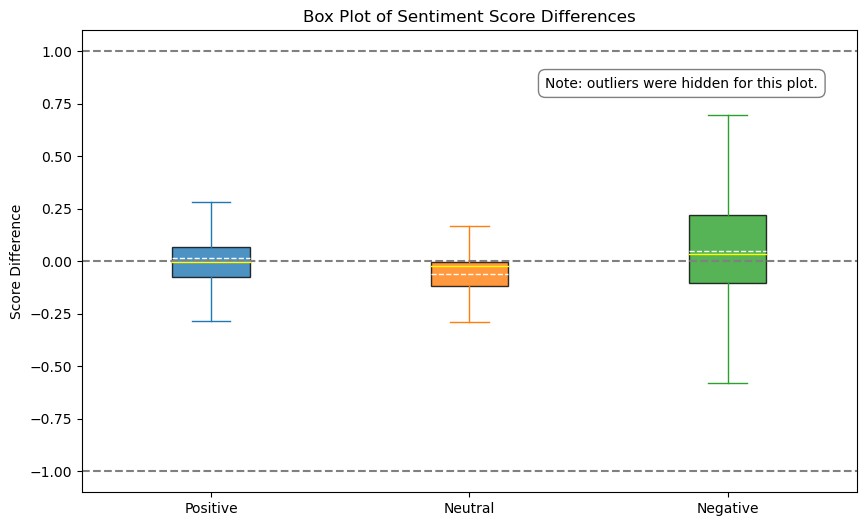

In [19]:
# Define the colors for each sentiment
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue for POS, orange for NEU, green for NEG

# Create box plots with custom colors and mean line, and hide outliers
plt.figure(figsize=(10, 6))
bp = plt.boxplot([df['diff_POS'], df['diff_NEU'], df['diff_NEG']], labels=['Positive', 'Neutral', 'Negative'],
                 patch_artist=True, showmeans=True, meanline=True, showfliers=False)
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(1, color='gray', linestyle='--')
plt.axhline(-1, color='gray', linestyle='--')

plt.text(0.95, 0.90, 'Note: outliers were hidden for this plot.', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

# Set the properties of the boxplot elements
for i, color in enumerate(colors):
    plt.setp(bp['boxes'][i], facecolor=color, alpha=0.8)
    plt.setp(bp['whiskers'][2*i:2*i+2], color=color)
    plt.setp(bp['caps'][2*i:2*i+2], color=color)
    # As outliers are hidden, no need to set fliers properties
    plt.setp(bp['means'][i], color='white')
    plt.setp(bp['medians'][i], color='yellow')

plt.title('Box Plot of Sentiment Score Differences')
plt.ylabel('Score Difference')
plt.show()

In [21]:
from scipy.stats import ttest_rel

# Assuming df is your DataFrame with the relevant columns

# Conduct paired t-tests
t_test_POS = ttest_rel(df['Spanish_POS'], df['English_POS'])
t_test_NEU = ttest_rel(df['Spanish_NEU'], df['English_NEU'])
t_test_NEG = ttest_rel(df['Spanish_NEG'], df['English_NEG'])

alpha = 0.05

# Conduct paired t-tests and filter results based on significance level
t_test_POS = ttest_rel(df['Spanish_POS'], df['English_POS'])
if t_test_POS.pvalue < alpha:
    print(f"Paired T-Test for POS is significant: statistic={t_test_POS.statistic}, p-value={t_test_POS.pvalue}")
else:
    print(f"Paired T-Test for POS there is not significant: p-value={t_test_POS.pvalue}")

t_test_NEU = ttest_rel(df['Spanish_NEU'], df['English_NEU'])
if t_test_NEU.pvalue < alpha:
    print(f"Paired T-Test for NEU there is significant: statistic={t_test_NEU.statistic}, p-value={t_test_NEU.pvalue}")
else:
    print(f"Paired T-Test for NEU is there is not significant: p-value={t_test_NEU.pvalue}")

t_test_NEG = ttest_rel(df['Spanish_NEG'], df['English_NEG'])
if t_test_NEG.pvalue < alpha:
    print(f"Paired T-Test for NEG there is significant: statistic={t_test_NEG.statistic}, p-value={t_test_NEG.pvalue}")
else:
    print(f"Paired T-Test for NEG there is not significant: p-value={t_test_NEG.pvalue}")

Paired T-Test for POS there is not significant: p-value=0.13233801573534024
Paired T-Test for NEU there is significant: statistic=7.114636814615753, p-value=2.7184535377276314e-12
Paired T-Test for NEG there is significant: statistic=-4.635502435008321, p-value=4.228512540902688e-06


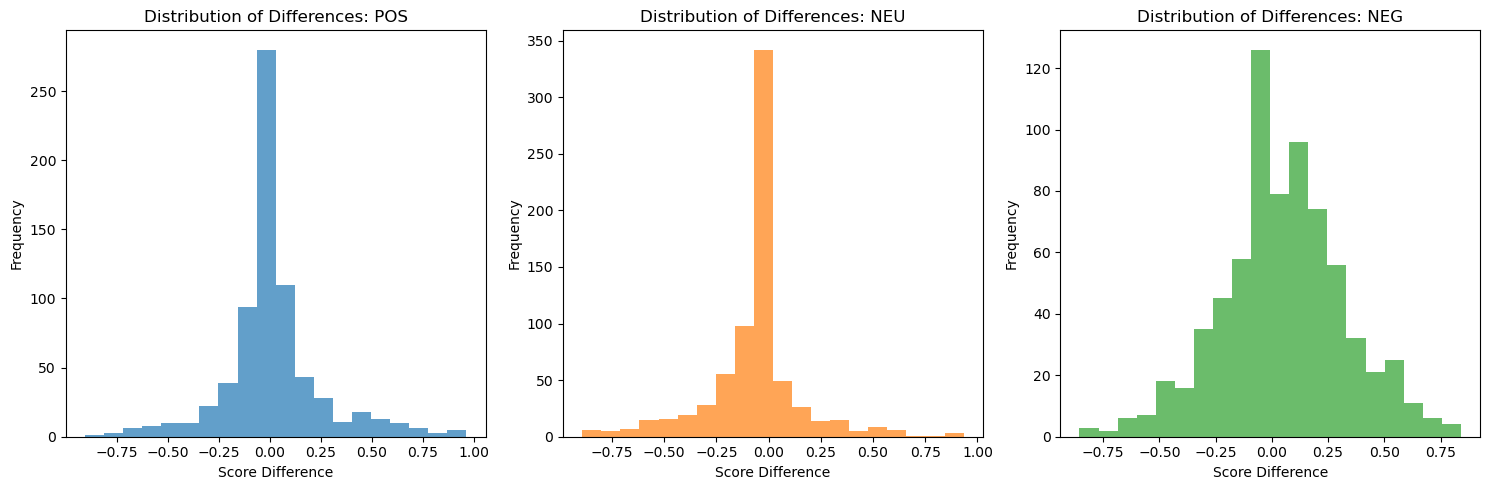

In [22]:
# Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, orange, green

for i, sentiment in enumerate(['POS', 'NEU', 'NEG']):
    axes[i].hist(df[f'diff_{sentiment}'], bins=20, color=colors[i], alpha=0.7)
    axes[i].set_title(f'Distribution of Differences: {sentiment}')
    axes[i].set_xlabel('Score Difference')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Why do Joy and Anger have so much spread?

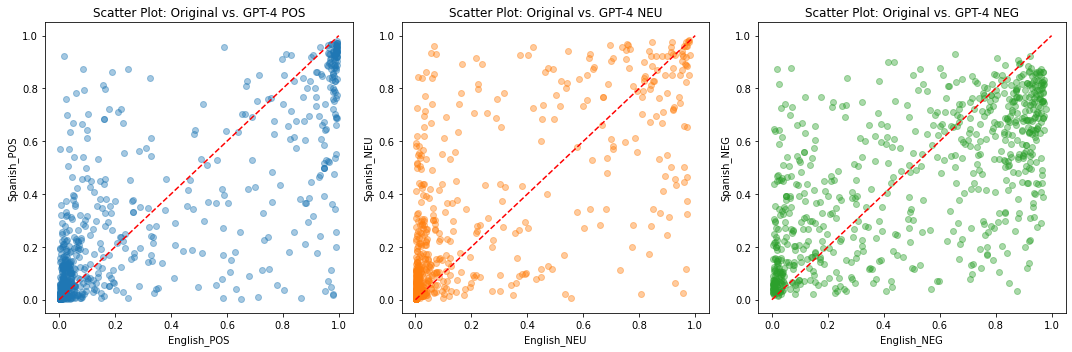

In [20]:
# Plot scatter plots with a line of equality
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, orange, green

for i, sentiment in enumerate(['POS', 'NEU', 'NEG']):
    axes[i].scatter(df[f'English_{sentiment}'], df[f'Spanish_{sentiment}'],color=colors[i], alpha=0.4)
    axes[i].plot([0, 1], [0, 1], 'r--')  # Line of equality
    axes[i].set_title(f'Scatter Plot: Original vs. GPT-4 {sentiment}')
    axes[i].set_xlabel(f'English_{sentiment}')
    axes[i].set_ylabel(f'Spanish_{sentiment}')

plt.tight_layout()
plt.show()
